## Codeblock data preperation
Loading csv data and extracting the data necessary features.

In [1]:
# import numpy as np
import pandas as pd

attribute_names = []
X = []
y = []
class_names = ['False', 'True']

# Load csv dataset (Brain Tumor.csv).
data = pd.read_csv(r'./data/Brain Tumor.csv', header=0)
dataframe = pd.DataFrame(data)

# Attribute_names label.
attribute_names = list(data.columns)

# All data features with 'Class' removed.
X = dataframe.drop(['Class', 'Image'], axis=1).values

# Classifier for brain tumor (true or false).
y = dataframe['Class'].to_numpy()

print(y)
print(X)   

[0 0 1 ... 0 0 0]
[[6.53533936e+000 6.19587845e+002 2.48915215e+001 ... 4.47334559e+000
  9.81938697e-001 7.45834073e-155]
 [8.74996948e+000 8.05957634e+002 2.83893930e+001 ... 3.22007157e+000
  9.88834396e-001 7.45834073e-155]
 [7.34109497e+000 1.14380822e+003 3.38202339e+001 ... 5.98179980e+000
  9.78013693e-001 7.45834073e-155]
 ...
 [1.80115204e+001 1.15158276e+003 3.39349785e+001 ... 5.10369972e+000
  9.52181237e-001 7.45834073e-155]
 [1.33304291e+001 9.45732779e+002 3.07527686e+001 ... 6.43978421e+000
  9.40898110e-001 7.45834073e-155]
 [6.11013794e+000 4.80884025e+002 2.19290680e+001 ... 6.78732909e+000
  9.38730786e-001 7.45834073e-155]]


## Codeblock data classification
General descision tree 
decision tree optimalistion


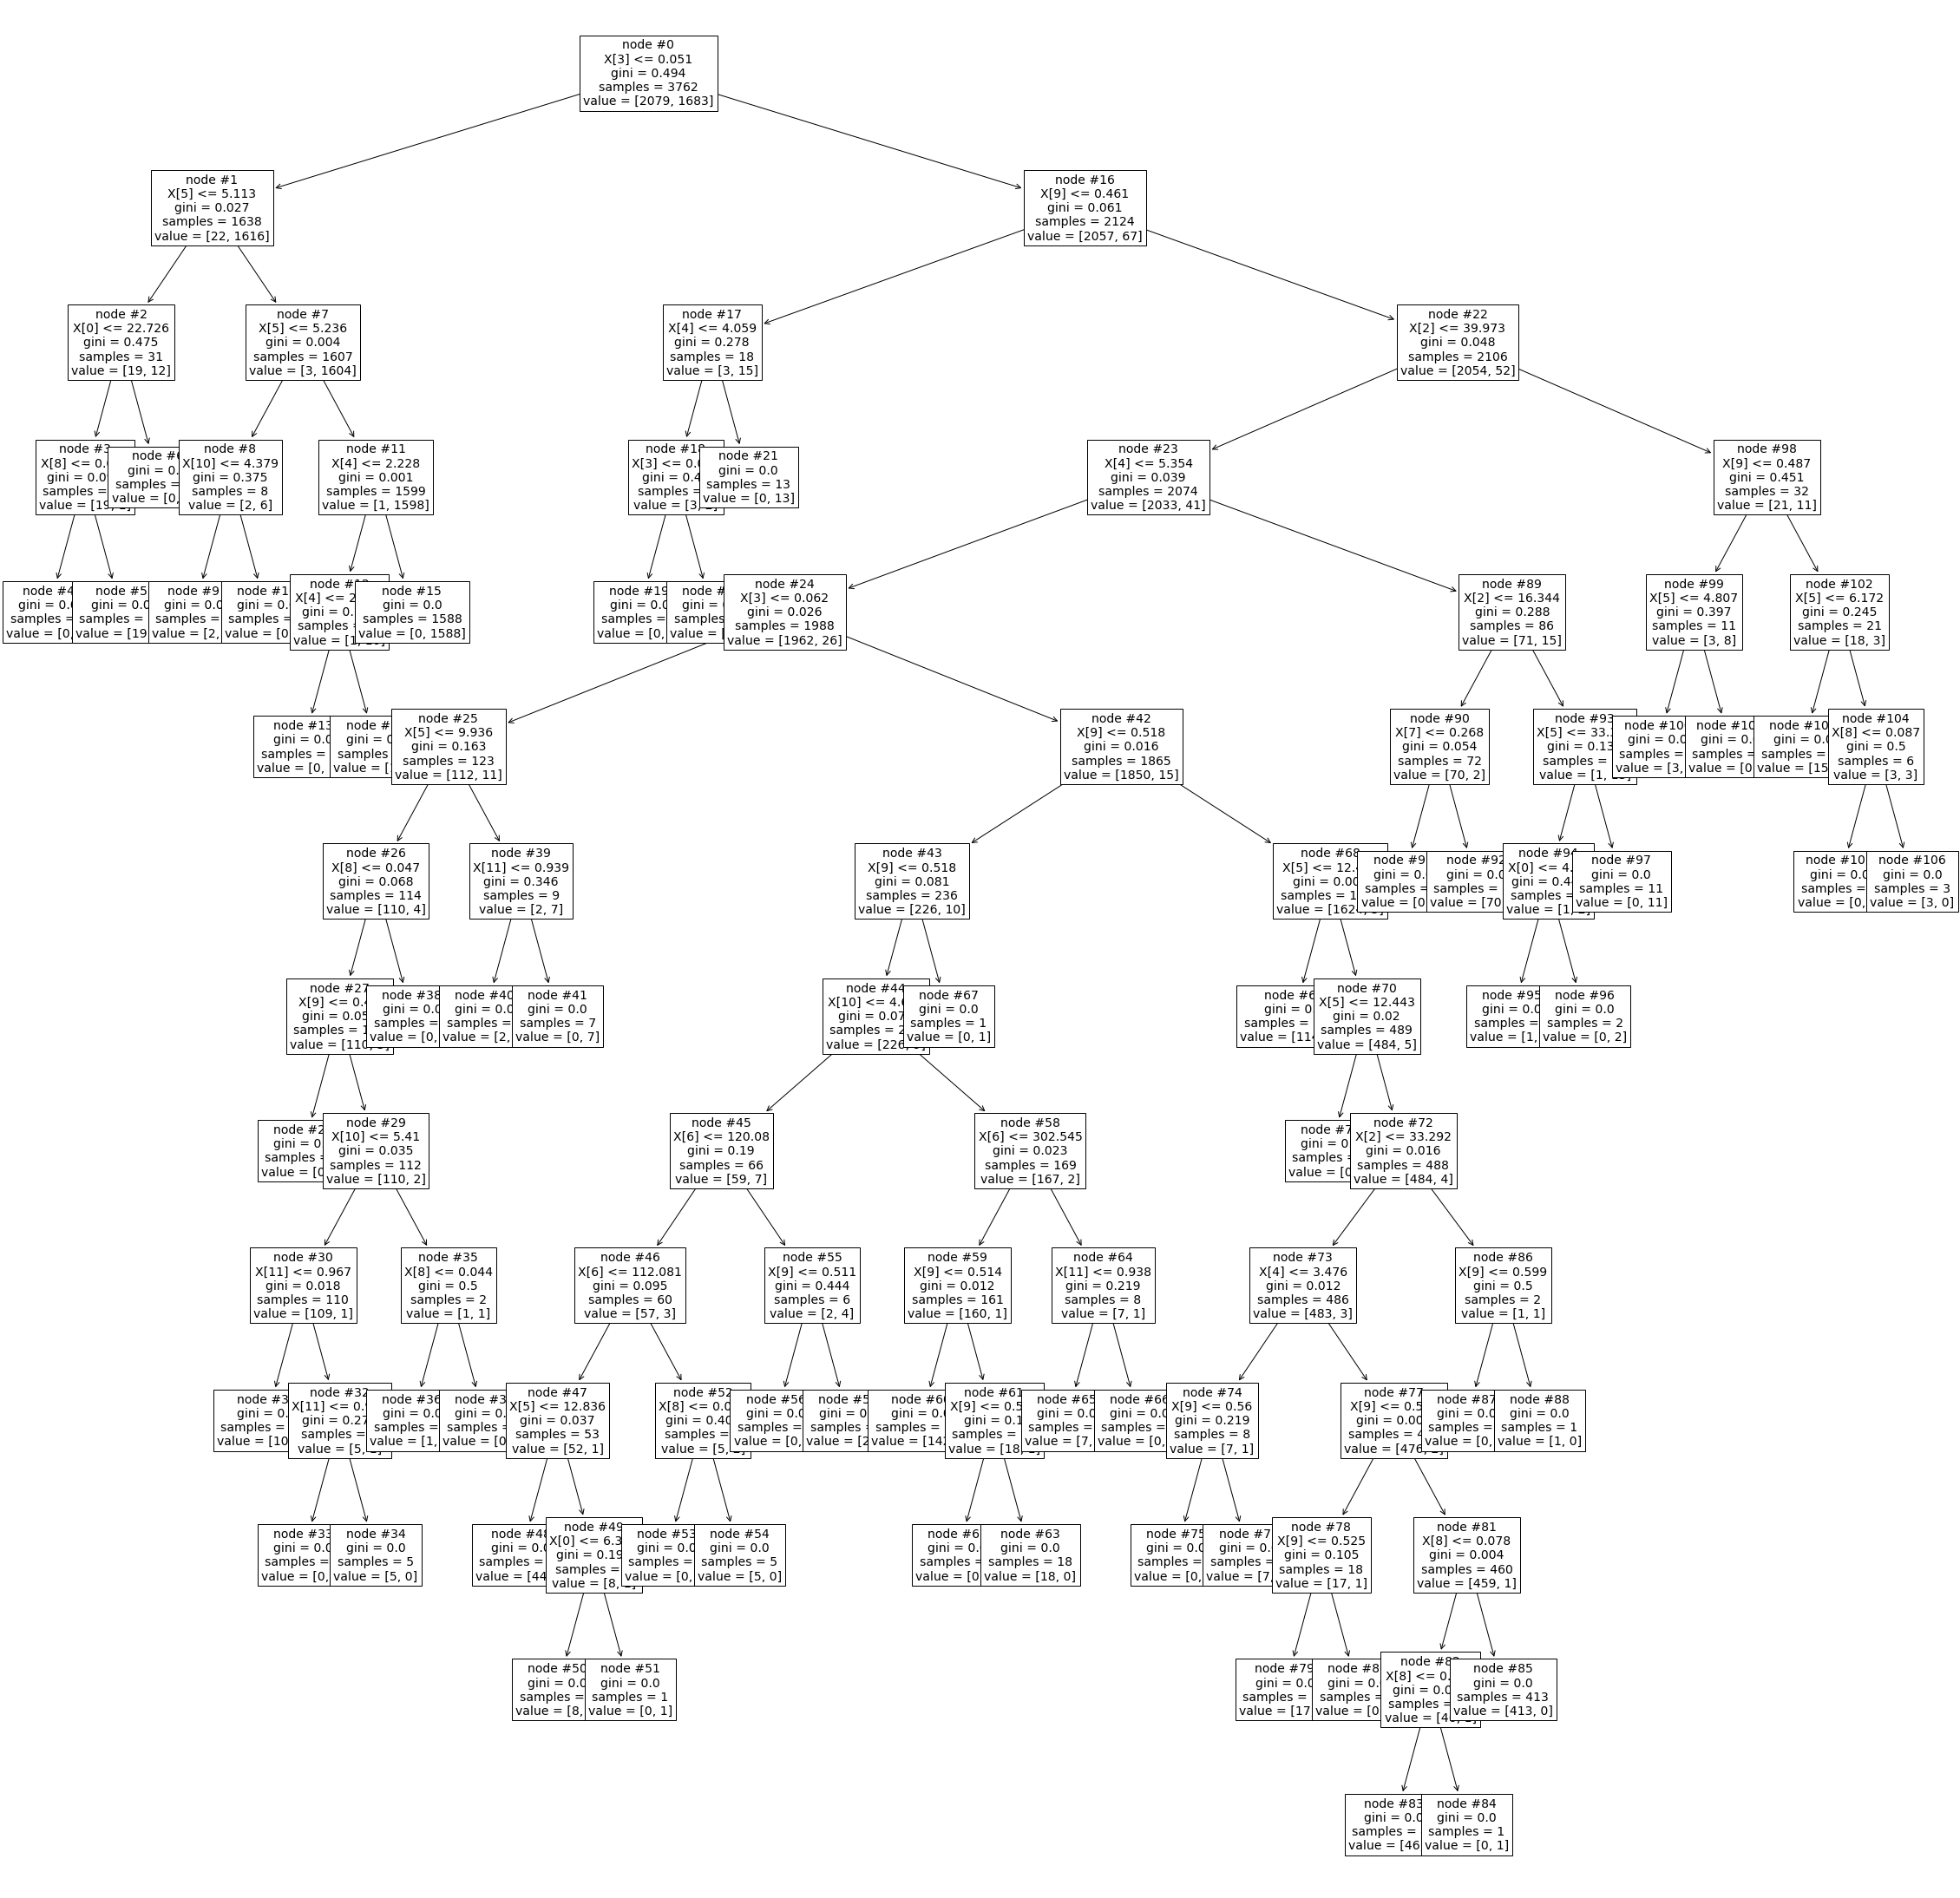

Figure 1: A generated Decision tree from Brain Tumor.csv based on all data


In [2]:
from sklearn import tree
import matplotlib.pyplot as plt

# dtc variable
dtc = None

dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(X, y)

plt.figure(figsize=(40,40))
tree.plot_tree(dtc, fontsize=14, node_ids=True)
plt.show()
print("Figure 1: A generated Decision tree from Brain Tumor.csv based on all data")

In [18]:
import itertools
from sklearn.linear_model import LogisticRegression

hyper_params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_sample_split': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2']
}

a = hyper_params.values()
combinations = list(itertools.product(*a))

for c in combinations:
    LogisticRegression(penalty=c[0], class_weight=c[1], max_iter=c[2])

[('gini', 10, 1, 'auto'), ('gini', 10, 1, 'sqrt'), ('gini', 10, 1, 'log2'), ('gini', 10, 2, 'auto'), ('gini', 10, 2, 'sqrt'), ('gini', 10, 2, 'log2'), ('gini', 10, 3, 'auto'), ('gini', 10, 3, 'sqrt'), ('gini', 10, 3, 'log2'), ('gini', 20, 1, 'auto'), ('gini', 20, 1, 'sqrt'), ('gini', 20, 1, 'log2'), ('gini', 20, 2, 'auto'), ('gini', 20, 2, 'sqrt'), ('gini', 20, 2, 'log2'), ('gini', 20, 3, 'auto'), ('gini', 20, 3, 'sqrt'), ('gini', 20, 3, 'log2'), ('gini', 30, 1, 'auto'), ('gini', 30, 1, 'sqrt'), ('gini', 30, 1, 'log2'), ('gini', 30, 2, 'auto'), ('gini', 30, 2, 'sqrt'), ('gini', 30, 2, 'log2'), ('gini', 30, 3, 'auto'), ('gini', 30, 3, 'sqrt'), ('gini', 30, 3, 'log2'), ('gini', 40, 1, 'auto'), ('gini', 40, 1, 'sqrt'), ('gini', 40, 1, 'log2'), ('gini', 40, 2, 'auto'), ('gini', 40, 2, 'sqrt'), ('gini', 40, 2, 'log2'), ('gini', 40, 3, 'auto'), ('gini', 40, 3, 'sqrt'), ('gini', 40, 3, 'log2'), ('gini', 50, 1, 'auto'), ('gini', 50, 1, 'sqrt'), ('gini', 50, 1, 'log2'), ('gini', 50, 2, 'auto'),

100%|██████████| 19/19 [00:52<00:00,  2.77s/it]


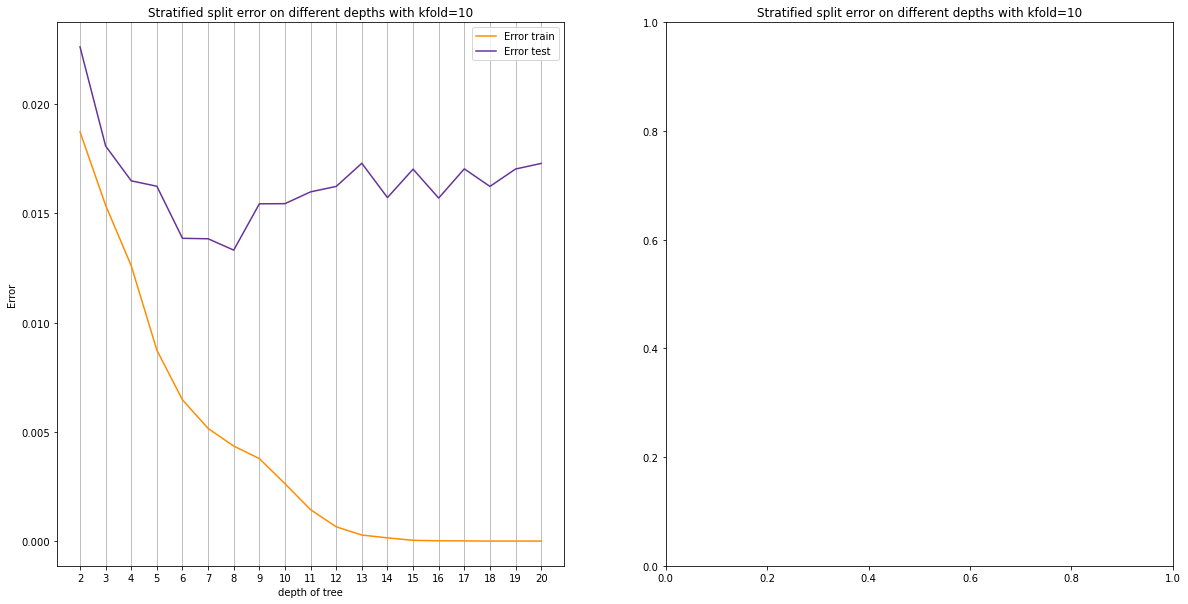

In [81]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import StratifiedKFold
from tqdm import tqdm


skf = StratifiedKFold(n_splits=100)

def splitFunction(criterion):    
    error_train = []
    error_test = []
    f, axs = plt.subplots(1, 2, figsize=(20,10))

    for depth in tqdm(range(2,21)):
        train_depth = []
        test_depth = []

        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            dtc = tree.DecisionTreeClassifier(criterion=criterion, max_depth=depth)
            dtc = dtc.fit(X_train, y_train)

            train_depth.append(1 - dtc.score(X_train, y_train))
            test_depth.append(1 - dtc.score(X_test, y_test))

        error_train.append(np.mean(np.array(train_depth)))
        error_test.append(np.mean(np.array(test_depth)))

    axs[0].plot(np.arange(2, 21), error_train, label='Error train', color='darkorange')
    axs[0].plot(np.arange(2, 21), error_test, label='Error test', color='rebeccapurple')
    axs[0].set_xlabel('depth of tree')
    axs[0].set_ylabel('Error')
    axs[0].set_title('Stratified split error on different depths with kfold=10')
    axs[0].set_xticks(np.arange(2, 21))
    axs[0].grid(axis = 'x')
    axs[0].legend()

    plt.title('Stratified split error on different depths with kfold=10')
    
for i in range(1):
    splitFunction("gini")

## Code block 2
Prediction of a sample

In [79]:
sample = X[[9]]
prediction = dtc.predict(sample.reshape(1, -1))[0]

print(dtc.decision_path(sample))
print(f"Predicted class: {class_names[prediction]}")

  (0, 0)	1
  (0, 1)	1
  (0, 3)	1
  (0, 5)	1
Predicted class: True


## Code block 3
Accuracy

In [80]:
accuracy = dtc.score(X, y)
print(accuracy)

0.9819245082402978


## Codeblock knn
knn optimalisatie

## Codeblock classifier performance and comparison